# Data Management and Preprocessing Masks

Checklist
- Save to their own directory
- Preprocess mask before saving

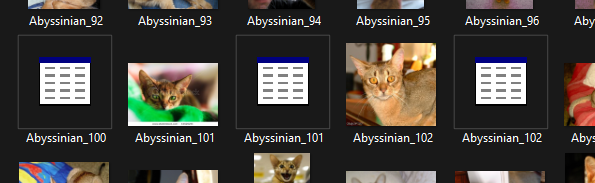

In [149]:
import os
import shutil

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [150]:
# Generate directories if they do not exist yet
# DIRECTORIES
CURR_DIR = os.getcwd()
DATA_DIR = os.path.join(CURR_DIR,"data")
IMG_DIR = os.path.join(DATA_DIR,"img")
MASK_DIR = os.path.join(DATA_DIR,"mask")

# OLD DIRECTORIES
OLD_DATA_DIR = os.path.join(CURR_DIR,"data_old")
OLD_IMG_DIR = os.path.join(OLD_DATA_DIR,"images")
OLD_MASK_DIR = os.path.join(OLD_DATA_DIR,"annotations","trimaps")


In [151]:
# Generate the following directories if they do not exist
if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)
if not os.path.exists(IMG_DIR):
    os.makedirs(IMG_DIR)
if not os.path.exists(MASK_DIR):
    os.makedirs(MASK_DIR)

In [152]:
img_list = [img_ for img_ in os.listdir(OLD_IMG_DIR) if not img_.startswith(".") and (img_.endswith(".jpg") or img_.endswith(".png"))]
mask_list =[mask_ for mask_ in os.listdir(OLD_MASK_DIR) if not mask_.startswith(".") and (mask_.endswith(".jpg") or mask_.endswith(".png"))]
img_list = sorted(img_list)
mask_list = sorted(mask_list)
print(img_list)
print(mask_list)

['Abyssinian_1.jpg', 'Abyssinian_10.jpg', 'Abyssinian_100.jpg', 'Abyssinian_101.jpg', 'Abyssinian_102.jpg', 'Abyssinian_103.jpg', 'Abyssinian_104.jpg', 'Abyssinian_105.jpg', 'Abyssinian_106.jpg', 'Abyssinian_107.jpg', 'Abyssinian_108.jpg', 'Abyssinian_109.jpg', 'Abyssinian_11.jpg', 'Abyssinian_110.jpg', 'Abyssinian_111.jpg', 'Abyssinian_112.jpg', 'Abyssinian_113.jpg', 'Abyssinian_114.jpg', 'Abyssinian_115.jpg', 'Abyssinian_116.jpg', 'Abyssinian_117.jpg', 'Abyssinian_118.jpg', 'Abyssinian_119.jpg', 'Abyssinian_12.jpg', 'Abyssinian_120.jpg', 'Abyssinian_121.jpg', 'Abyssinian_122.jpg', 'Abyssinian_123.jpg', 'Abyssinian_124.jpg', 'Abyssinian_125.jpg', 'Abyssinian_126.jpg', 'Abyssinian_127.jpg', 'Abyssinian_128.jpg', 'Abyssinian_129.jpg', 'Abyssinian_13.jpg', 'Abyssinian_130.jpg', 'Abyssinian_131.jpg', 'Abyssinian_132.jpg', 'Abyssinian_133.jpg', 'Abyssinian_134.jpg', 'Abyssinian_135.jpg', 'Abyssinian_136.jpg', 'Abyssinian_137.jpg', 'Abyssinian_138.jpg', 'Abyssinian_139.jpg', 'Abyssinian_14.

In [153]:
# Check if they are the same length
len(img_list) == len(mask_list)

True

In [154]:
# Check if all images and masks contains the same name and have the same index
for (img,mask) in zip(img_list,mask_list):
    if img.split(".")[0] != mask.split(".")[0]:
        print("Not equal ",img," != ",mask)

In [155]:
df = pd.read_csv((os.path.join(OLD_DATA_DIR,'annotations','list.txt')), comment='#',header=None, sep=" ")
df.columns = ['image_name','class_index','specie_index','breed_index']
df = df.sort_values(by = 'image_name', ascending=True)
df = df.reset_index(drop=True)

# Get dict ("image_name": specie_index)
specie_dict = df.set_index("image_name")["specie_index"].to_dict()

In [156]:
# specie_dict and img_list must have the same length
len(specie_dict) == len(img_list)

False

In [157]:
# Since specie_dict and img_list do not have the same length, we now check which of the images do not have label
no_labels = []
upd_img_list = []
upd_mask_list = []
for img,mask in zip(img_list,mask_list):

    if img.split(".")[0] not in specie_dict:
        no_labels.append(img)
        print(f"{img} has no label")
    else: 
        upd_img_list.append(img)
        upd_mask_list.append(mask)

print(f"count of images without label: {len(no_labels)}")

Abyssinian_34.jpg has no label
Abyssinian_82.jpg has no label
Bombay_11.jpg has no label
Bombay_189.jpg has no label
Bombay_190.jpg has no label
Bombay_192.jpg has no label
Bombay_203.jpg has no label
Bombay_206.jpg has no label
Bombay_209.jpg has no label
Bombay_210.jpg has no label
Bombay_217.jpg has no label
Bombay_22.jpg has no label
Bombay_220.jpg has no label
Bombay_32.jpg has no label
Bombay_69.jpg has no label
Bombay_85.jpg has no label
Bombay_92.jpg has no label
Bombay_99.jpg has no label
Egyptian_Mau_129.jpg has no label
Egyptian_Mau_139.jpg has no label
Egyptian_Mau_145.jpg has no label
Egyptian_Mau_167.jpg has no label
Egyptian_Mau_177.jpg has no label
Egyptian_Mau_183.jpg has no label
Egyptian_Mau_191.jpg has no label
Egyptian_Mau_202.jpg has no label
Egyptian_Mau_41.jpg has no label
Egyptian_Mau_71.jpg has no label
Siamese_203.jpg has no label
boxer_82.jpg has no label
english_cocker_spaniel_162.jpg has no label
english_cocker_spaniel_163.jpg has no label
english_cocker_s

In [158]:
# Transfer images and masks to their new directories

for img,mask in zip(upd_img_list,upd_mask_list):

    source_img = os.path.join(OLD_IMG_DIR,img)
    source_mask = os.path.join(OLD_MASK_DIR,mask)

    shutil.copy(source_img,IMG_DIR)
    shutil.copy(source_mask,MASK_DIR)

In [159]:
# Check length of old directories and new directories
print(f"old image directory len: {len(os.listdir(OLD_IMG_DIR))}") 
print(f"old mask directory len: {len(os.listdir(OLD_MASK_DIR))}") 
print(f"new image directory len: {len(os.listdir(IMG_DIR))}") 
print(f"new mask directory len: {len(os.listdir(MASK_DIR))}") 

old image directory len: 7393
old mask directory len: 14780
new image directory len: 7349
new mask directory len: 7349


In [160]:
# Transfer text file containing the labels to the new directory
shutil.copy(os.path.join(OLD_DATA_DIR,"annotations","list.txt"),DATA_DIR)

'/mnt/c/Users/rjome/Documents/Machine_Learning/Cat_Dog_Semantic_Segmentation/data/list.txt'

In [161]:
def load_mask(file_name):
    mask_file = os.path.join(MASK_DIR,file_name)
    mask = cv2.imread(mask_file,0)

    return mask

def fix_mask(file_name,mask):
    specie_index = specie_dict[file_name.split(".")[0]]

    bg = 0
    condition_object = np.logical_or(mask==1,mask==3)

    fixed_mask = np.where(condition_object,specie_index,bg)

    classes = ["background","cat","dog"]
    class_val = [i for i,_ in enumerate(classes)]
    fixed_mask = np.array([(fixed_mask == class_) for class_ in class_val])
    fixed_mask = np.stack(fixed_mask, axis = -1).astype('float')

    fixed_mask = np.argmax(fixed_mask, axis=2)

    return fixed_mask

def save_mask(file_name,mask_dir,mask):
    cv2.imwrite(os.path.join(mask_dir,file_name),mask)

In [165]:
for i,mask_file_name in enumerate(upd_mask_list):
    mask_ = load_mask(mask_file_name)
    mask_ = fix_mask(mask_file_name,mask_)
    save_mask(mask_file_name,MASK_DIR,mask_)

    if i % 10 == 0:
        print(f"{i} out of {len(mask_list)} done")

0 out of 7390 done
10 out of 7390 done
20 out of 7390 done
30 out of 7390 done
40 out of 7390 done
50 out of 7390 done
60 out of 7390 done
70 out of 7390 done
80 out of 7390 done
90 out of 7390 done
100 out of 7390 done
110 out of 7390 done
120 out of 7390 done
130 out of 7390 done
140 out of 7390 done
150 out of 7390 done
160 out of 7390 done
170 out of 7390 done
180 out of 7390 done
190 out of 7390 done
200 out of 7390 done
210 out of 7390 done
220 out of 7390 done
230 out of 7390 done
240 out of 7390 done
250 out of 7390 done
260 out of 7390 done
270 out of 7390 done
280 out of 7390 done
290 out of 7390 done
300 out of 7390 done
310 out of 7390 done
320 out of 7390 done
330 out of 7390 done
340 out of 7390 done
350 out of 7390 done
360 out of 7390 done
370 out of 7390 done
380 out of 7390 done
390 out of 7390 done
400 out of 7390 done
410 out of 7390 done
420 out of 7390 done
430 out of 7390 done
440 out of 7390 done
450 out of 7390 done
460 out of 7390 done
470 out of 7390 done
480